In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix

from sklearn.datasets import load_wine



In [2]:
wine =load_wine()

In [3]:
features = pd.DataFrame(wine.data,columns=wine.feature_names)
target = pd.DataFrame(wine.target,columns=['TARGET'])

data = pd.concat([features,target],axis=1)


In [4]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
x1 = np.array(data['hue'])
x2 = np.array(data['proline'])
y= np.array(data['TARGET'])

In [32]:
x1.ndim

2

In [6]:
x = np.column_stack((x1,x2))

In [7]:
x

array([[1.040e+00, 1.065e+03],
       [1.050e+00, 1.050e+03],
       [1.030e+00, 1.185e+03],
       [8.600e-01, 1.480e+03],
       [1.040e+00, 7.350e+02],
       [1.050e+00, 1.450e+03],
       [1.020e+00, 1.290e+03],
       [1.060e+00, 1.295e+03],
       [1.080e+00, 1.045e+03],
       [1.010e+00, 1.045e+03],
       [1.250e+00, 1.510e+03],
       [1.170e+00, 1.280e+03],
       [1.150e+00, 1.320e+03],
       [1.250e+00, 1.150e+03],
       [1.200e+00, 1.547e+03],
       [1.280e+00, 1.310e+03],
       [1.070e+00, 1.280e+03],
       [1.130e+00, 1.130e+03],
       [1.230e+00, 1.680e+03],
       [9.600e-01, 8.450e+02],
       [1.090e+00, 7.800e+02],
       [1.030e+00, 7.700e+02],
       [1.110e+00, 1.035e+03],
       [1.090e+00, 1.015e+03],
       [1.120e+00, 8.450e+02],
       [1.130e+00, 8.300e+02],
       [9.200e-01, 1.195e+03],
       [1.020e+00, 1.285e+03],
       [1.250e+00, 9.150e+02],
       [1.040e+00, 1.035e+03],
       [1.190e+00, 1.285e+03],
       [1.090e+00, 1.515e+03],
       [

In [8]:
x.shape

(178, 2)

In [9]:
y.shape

(178,)

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [11]:
np.ndim(xtrain)

2

In [12]:
# MinMaxScaler - scales features to lie between a given minimum and maximum value, often between zero and one

scaler = MinMaxScaler()

In [13]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

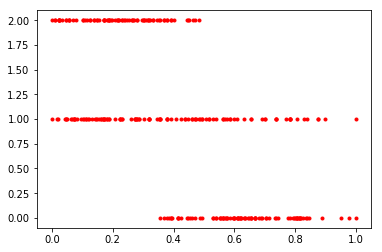

In [14]:
plt.plot(xtrain,ytrain,'r.')

In [15]:
# to calculate the k value i.e the no. of nearest neighbors

int(np.sqrt(len(xtrain)))    

11

In [16]:
# n_neighbors indicates k value
# minkowski is a parameter to cal. distance instead of euclidean_distance
# p - to cal. the euclidean_distance when using minkowski we should set p=2.
# p is a power parameter for the Minkowski metric. 

classifier = KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2) 

In [17]:
classifier.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [18]:
ypred = classifier.predict(xtest)

In [19]:
ypred

array([1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 1, 1, 2, 0, 1, 2, 0, 1, 1, 1,
       2, 2, 2, 1, 0, 1, 0, 0, 2, 0, 2, 1, 0, 1])

In [20]:
cm = confusion_matrix(ytest,ypred)

In [21]:
cm

array([[10,  4,  1],
       [ 0, 12,  2],
       [ 0,  0,  7]], dtype=int64)

[[-1.   -0.99 -0.98 ...  1.97  1.98  1.99]
 [-1.   -0.99 -0.98 ...  1.97  1.98  1.99]
 [-1.   -0.99 -0.98 ...  1.97  1.98  1.99]
 ...
 [-1.   -0.99 -0.98 ...  1.97  1.98  1.99]
 [-1.   -0.99 -0.98 ...  1.97  1.98  1.99]
 [-1.   -0.99 -0.98 ...  1.97  1.98  1.99]]


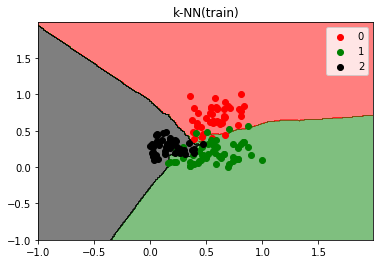

In [48]:
x_set,y_set = xtrain,ytrain

x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                    np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01))
print(x1)                  
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
                                     alpha=0.5,cmap=ListedColormap(('red','green','black')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],
                c = ListedColormap(('red','green','black'))(i),label=j)

# np.unique(y_set) will contain the no. of classes i.e 0,1,2
# for j=0, y_set == 0 will contain all the points whose y_set value is equal to 0. 
# x_set[y_set == j] indicates all the points whose x values correspond to the class 0 when j=0.

plt.title('k-NN(train)')
plt.legend()

In [39]:
x_set

array([[0.22988506, 0.07377049],
       [0.55172414, 0.73360656],
       [0.43678161, 0.07786885],
       [0.03448276, 0.10245902],
       [0.56321839, 0.6352459 ],
       [0.35632184, 0.01803279],
       [1.        , 0.09508197],
       [0.06896552, 0.11065574],
       [0.37931034, 0.48770492],
       [0.8045977 , 0.31967213],
       [0.62068966, 0.5942623 ],
       [0.26436782, 0.25409836],
       [0.5862069 , 0.04508197],
       [0.20689655, 0.33196721],
       [0.56321839, 0.6352459 ],
       [0.8045977 , 0.70491803],
       [0.08045977, 0.30327869],
       [0.7816092 , 0.11311475],
       [0.43678161, 0.22459016],
       [0.56321839, 0.61065574],
       [0.73563218, 0.08360656],
       [0.17241379, 0.26639344],
       [0.04597701, 0.17213115],
       [0.16091954, 0.05081967],
       [0.8045977 , 0.77459016],
       [0.17241379, 0.40163934],
       [0.6091954 , 0.61885246],
       [0.54022989, 0.81557377],
       [0.4137931 , 0.56967213],
       [0.52873563, 0.61885246],
       [0.

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.8055555555555556


0 0
[0.55172414 0.56321839 0.37931034 0.62068966 0.56321839 0.8045977
 0.56321839 0.8045977  0.6091954  0.54022989 0.4137931  0.52873563
 0.5862069  0.8045977  0.66666667 0.45977011 0.52873563 0.57471264
 0.47126437 0.66666667 0.3908046  0.65517241 0.65517241 0.4137931
 0.65517241 0.59770115 0.68965517 0.59770115 0.55172414 0.83908046
 0.35632184 0.66666667 0.42528736 0.7816092  0.36781609 0.3908046
 0.59770115 0.44827586 0.57471264 0.64367816 0.49425287 0.54022989
 0.79310345 0.71264368]
1 1
[0.22988506 0.43678161 0.35632184 1.         0.8045977  0.5862069
 0.7816092  0.43678161 0.73563218 0.16091954 0.87356322 0.17241379
 0.28735632 0.47126437 0.45977011 0.44827586 0.3908046  0.22988506
 0.48275862 0.83908046 0.7816092  0.82758621 0.73563218 0.47126437
 0.59770115 0.73563218 0.89655172 0.45977011 0.7816092  0.51724138
 0.65517241 0.56321839 0.20689655 0.49425287 0.27586207 0.63218391
 0.51724138 0.28735632 0.68965517 0.49425287 0.56321839 0.37931034
 0.7816092  0.57471264 0.6091954  

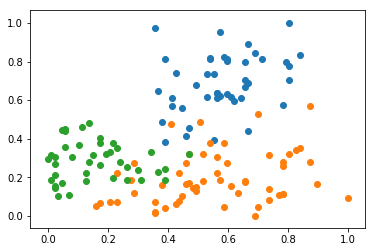

In [24]:
for i,j in enumerate(np.unique(y_set)):
    print(i,j)
    print(x_set[y_set == j,0])
    plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1])

In [37]:
arr1=np.array([x1.ravel(),x2.ravel()])
arr1.ndim

2

In [36]:
arr=np.array([x1,x2])
arr.ndim

3

In [38]:
x1.ndim

2